# 광주 인공지능 사관학교
- - -
- 작성자 : 2반 한지호
- 작성일 : 20.07.21 화
- 5교시 머신러닝 시간에 사용한 선형 회귀 학습 자료

In [1]:
# !pip install mglearn

# 지도학습 - 선형회귀 (Linear Regression)

회귀 모델이란?

- 어떤 자료에 대해서 그 값에 영향을 주는 조건을 고려하여 구한 평균 <br>
(어떤 데이터들이 굉장히 크거나 작을지라도 전체적으로 이 데이터들은 전체 평균으로 회귀하려는 특징이 있다는 통계학 기법)


- \\( y = h(x_1, x_2, x_3, ..., x_k; W_1, W_2, W_3, ..., W_k) + \epsilon \\)

 - h() : 조건에 따른 평균을 구하는 함수 (회귀 모델)
 - x : 어떤 조건(특성)
 - W : 각 조건의 영향력(가중치)
 - e : ‘오차항’을 의미. 다양한 현실적인 한계로 인해 발생하는 불확실성으로 일종의 잡음(noise)

선형 모델이란?

- 입력 특성에 대한 선형 함수를 만들어 예측을 수행

- 다양한 선형 모델이 존재

- 분류와 회귀에 모두 사용 가능


<center>

시험성적 데이터

|X ( 학습 시간 )| Y ( 시험 점수 )|
|---|---|
|9 |90|
|8 |80|
|4| 40|
|2| 20|

7시간 공부 할 경우 성적은?
</center>



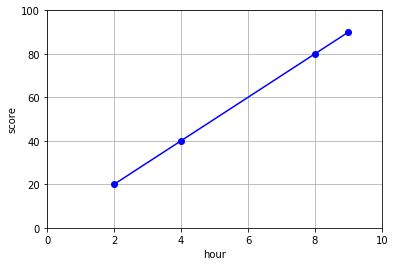

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

# 그래프 표현
x = [9, 8, 4, 2]
y = [90, 80, 40, 20]

plt.xlim(0, 10)
plt.ylim(0, 100)
plt.xlabel('hour')
plt.ylabel('score')
plt.grid(True)
plt.plot(x, y, 'b-o')

 \\( y=ax+b \\)

 - a : 기울기
 - b : 절편

<center>

시험성적 데이터

|X ( 학습 시간 )| Y ( 시험 점수 )|
|---|---|
|8 |97|
|6 |91|
|4| 93|
|2| 81|

7시간 공부 할 경우 성적은?
</center>



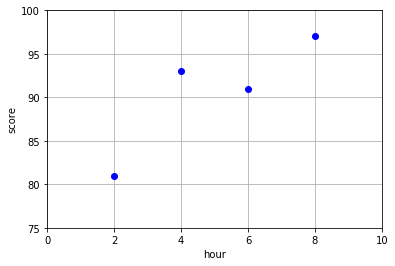

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

# 그래프 표현
x = [2, 4, 6, 8]
y = [81, 93, 91, 97]

plt.xlim(0, 10)
plt.ylim(75, 100)
plt.xlabel('hour')
plt.ylabel('score')
plt.grid(True)
plt.plot(x, y, 'bo')

 \\( y=ax+b \\)

 - a : 기울기
 - b : 절편

최소제곱법

> \\( a=\frac { (x-x평균)(y-y평균)의 합 }{ { (x-x평균) }^{ 2 }의 합 }  \\)

- 공부한 시간(x)의 평균: (2+4+6+8) / 4 = 5
- 성적(y)의 평균: (81+93+91+97) / 4 = 90.5

> \\( b=y의 평균- (x의 평균 \times 기울기 a) \\)

- b = 90.5 - (2.3 x 5) = 79


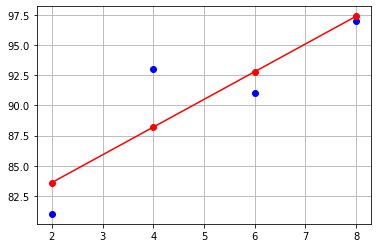

In [4]:
# 오차가 최저가 되는 직선
import numpy as np
# 기울기 a를 최소제곱법으로 구하는 함수
def compute_a(x, y, mean_x, mean_y):
    # 분자 부분
    dividend = 0
    for i in range(len(x)):
        dividend += (x[i] - mean_x) * (y[i] - mean_y)

    # 분모 부분  
    divisor = sum([(i - mean_x)**2 for i in x])
    a = dividend / divisor
    return a

mx = np.mean(x)
my = np.mean(y)

a = compute_a(x, y, mx, my)  # 기울기
b = my - (mx * a)            # 절편

y1 = [a * x1 + b for x1 in x]


plt.grid(True)
plt.plot(x, y, 'bo')
plt.plot(x, y1, 'r-o')

## 선형회귀(Linear Regression) <br>
 또는 최소제곱법(Ordinary Least Squares)

- 종속변수(응답변수) y와 한 개 이상의 독립변수(입력변수) x와의 상관관계를 모델링한 것

 >  \\( y=Wx+b \\)  
  - (W : 가중치, b : 편향(bias))

 > \\( H(x)=Wx+b \\)  
  - H(x) : Linear 하게 Hypothesis(가설)을 세운다는 것
  - 데이터를 가장 잘 대변할 수 있는 H(x)의 W와 b를 정하는 것이 Linear Regression의 목적

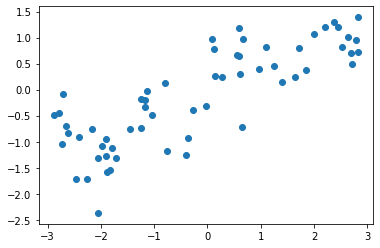

In [5]:
import numpy as np

def make_wave(n_samples=100):
    rnd = np.random.RandomState(42)
    x = rnd.uniform(-3, 3, size=n_samples)
    y_no_noise = (np.sin(4 * x) + x)
    y = (y_no_noise + rnd.normal(size=len(x))) / 2
    return x.reshape(-1, 1), y

X, y = make_wave(60)
plt.scatter(X, y)

w[0]: 0.393906  b: -0.031804


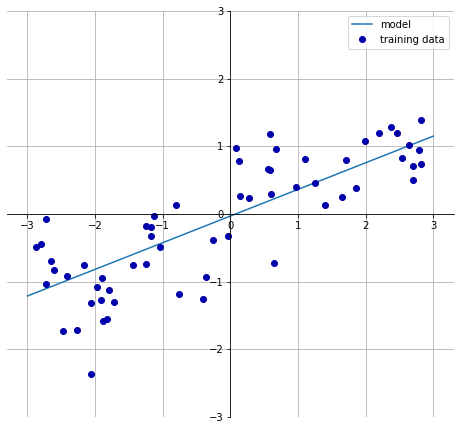

In [6]:
import mglearn
mglearn.plots.plot_linear_regression_wave()

- 비용함수 (Cost / Cost function) : 그려진 직선 Hypothesis(H(x))와 실제 데이터(y)의 차이

  - Cost = H(x) - y에 데이터를 대입하여 Cost의 총합을 구하는 것이 가능
  - Cost의 총합이 작은 Hypothesis일수록 데이터를 잘 대변하는 훌륭한 Linear Regression
  - Cost는 양수일 수도, 음수일 수도 있기에 이러한 문제를 방지하고자 총합을 구할 때 Cost값을 제곱하여 평균을 내는 방식(평균제곱오차, MSE, Mean Squared Error)을 사용
  >  \\( cost(W,b)=\cfrac { 1 }{ m } \sum _{ i=1 }^{ m } { (H({ x }^{ (i) })-{ y }^{ (i) }) }^{ 2 }  \\)

   > \\( H(x)=Wx+b \\)  

 - 머신러닝(or 딥러닝)에서 learning의 목적은 Cost를 정의하고 이를 최소화하는 것

#### 평균제곱오차 (MSE, Mean Squared Error) - 잘못그은 선 바로잡기

- 실제값과 예측값의 차이를 분석하기 위한 것
- 음수가 존재하는 경우 오차가 줄어드는 문제 -> 자승을 취함
- 평균오차가 자승으로 인해 커지는 문제 -> 제곱근을 취함

|x(hour) | y(score)|
|---|---|
|0|0|
|1|1|
|2|2|
|3|3|

\\( H(x)=1 \times  x+0 \\)  

\\( H(x)=0.5 \times x+0 \\)  

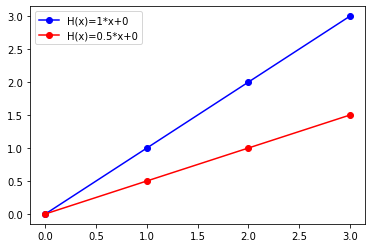

array([0, 1, 2, 3])

In [7]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

x = np.array([0, 1, 2, 3])
y = np.array([0, 1, 2, 3])

# 가중치(계수) 및 편향(절편)
w = 1
b = 0
y_pred = w * x + b
plt.plot(x, y_pred, 'b-o', label='H(x)=1*x+0')

w = 0.5
b = 0
y_pred1 = w * x + b
plt.plot(x, y_pred1, 'r-o', label='H(x)=0.5*x+0')

plt.legend(loc='upper left')
plt.show()
y_pred

#### 평균제곱오차 (MSE, Mean Squared Error) 연습 01
가설의 MSE 값을 계산해보자.


\\( \cfrac { { (H({ x }^{ (1) })-{ y }^{ (1) }) }^{ 2 } + { (H({ x }^{ (2) })-{ y }^{ (2) }) }^{ 2 }+ { (H({ x }^{ (3) })-{ y }^{ (3) }) }^{ 2 }+ { (H({ x }^{ (4) })-{ y }^{ (4) }) }^{ 2 } }{ 4 } = ? \\)

In [8]:
# y_pred(예측값), y(실제값)
def MSE(y_pred, y):
  cost = np.sum( (y_pred - y)**2 ) / len(y)
  return cost

cost = MSE(y_pred, y)
cost1 = MSE(y_pred1, y)
cost, cost1

(0.0, 0.875)

0.0
0.875


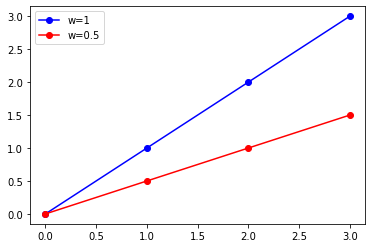

In [9]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

x = np.array([0, 1, 2, 3])
y = np.array([0, 1, 2, 3])

# 가중치(계수) 및 편향(절편)
w = 1
b = 0
y_pred = w * x + b
plt.plot(x, y_pred, 'b-o', label='w=1')
print(MSE(y_pred, y))

w = 0.5
b = 0
y_pred1 = w * x + b
plt.plot(x, y_pred1, 'r-o', label='w=0.5')
print(MSE(y_pred1, y))

plt.legend(loc='upper left')
plt.show()

#### 경사하강법 (Gradient descent algorithm) - 오차 수정하기

어떻게 비용함수 값이 최소가 되는 W 파라미터를 구할 수 있을까?

- 점진적인 하강, 점진적으로 반복적인 계산을 통해 W 파라미터 값을 업데이트 하면서 오류 값이 최소가 되는 값을 구하는 방식

- 함수의 기울기(경사)를 구하여 기울기가 낮은 쪽으로 
계속 이동하여 값을 최적화 시키는 방법 <br> (오차 (기울기)가 가장 작은 방향으로 이동시키는 방법)


learning_rate(학습 속도)란?

- W와 b의 미분 값(W_grad, b_grade)을 얼마만큼 반영할지를 결정하는 값.
- 주로 0.001, 0.00001과 같은 매우 작은 값을 사용하며 learning_rate가 클수록 변화가 빠르며, learning_rate가 작을수록 변화가 느리다고 예상.
- 꼭 변화가 빠르다고 해서 결과를 빨리 볼 수 있는 것은 아님.

 0 w1 = 0.118920, b = 0.278800 , cost = 4.027834
 1 w1 = 2.084049, b = 3.050751 , cost = 1.115914
 2 w1 = 2.120464, b = 3.731338 , cost = 0.806880
 3 w1 = 2.072790, b = 3.932716 , cost = 0.790438
 4 w1 = 2.051266, b = 3.996792 , cost = 0.792626
 5 w1 = 2.043611, b = 4.017669 , cost = 0.794274
 6 w1 = 2.041035, b = 4.024520 , cost = 0.794949
 7 w1 = 2.040181, b = 4.026774 , cost = 0.795180
 8 w1 = 2.039900, b = 4.027515 , cost = 0.795256
 9 w1 = 2.039807, b = 4.027759 , cost = 0.795281


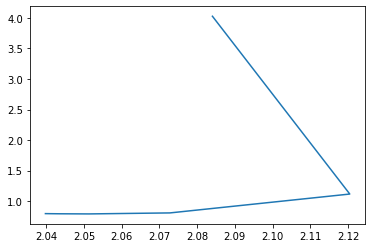

In [10]:
import matplotlib.pyplot as plt
w_val = []
cost_val = []

n_samples = 200
x1 = np.random.randn(n_samples)

y = 2 * x1 + 4 + np.random.randn(n_samples)

num_epoch = 10  # 반복횟수
lr = 0.7        # learning_rate(학습 속도)

w1 = np.random.uniform()
b = np.random.uniform()

for epoch in range(num_epoch):
    y_pred = w1*x1 + b
    cost = np.abs(y_pred - y).mean()
    print(f"{epoch:2} w1 = {w1:.6f}, b = {b:.6f} , cost = {cost:.6f}")

    w1 = w1 - lr*((y_pred - y)* x1).mean()
    b = b - lr*((y_pred - y)).mean()

    w_val.append(w1)
    cost_val.append(cost)

plt.plot(w_val, cost_val)
plt.show()

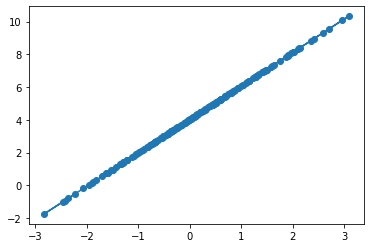

In [11]:
plt.plot(x1, y_pred, marker='o')

장단점

- k-NN에 비해 더 제약이 있는 것처럼 보이지만 특성이 많은 데이터셋의 경우에는 우수한 성능을 낼 수 있다.
- 모델의 복잡도를 제어할 방법이 없어 과대적합 되기 쉽다.


모델 정규화(Regularization)을 통해 과대적합을 제어